In [1]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Member,Message
from agents import Group

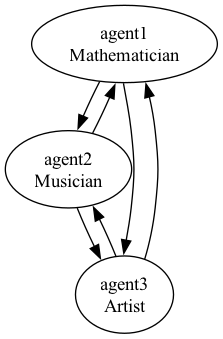

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Member(name="agent3", role="Artist", description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client) 

Image(g.draw_relations())

In [3]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [4]:
g.group_messages.context

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [5]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
print('-'*50)
print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=2))

--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "08ef89fe-f0cf-41bb-ba2b-52fa8808f674",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math.",
                "access_token": null
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music.",
                "access_token": null
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art.",
                "access_token": null
            }
        ],
        "relationships": {
            "agent1": [
     

In [6]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

Message(sender='agent2', action='talk', result='If you\'re looking for music that pairs well with reading, I can offer some suggestions. Many people find that instrumental music works best, as it helps create a calming atmosphere without being too distracting. Here are a few genres and artists you might consider:\n\n1. **Classical Music**: Composers like Johann Sebastian Bach and Claude Debussy offer soothing melodies that can enhance focus. Bach\'s "Goldberg Variations" or Debussy\'s "Clair de Lune" are excellent choices.\n\n2. **Ambient Music**: Artists like Brian Eno and Max Richter create soundscapes that are perfect for background listening. Eno\'s "Music for Airports" or Richter\'s "Sleep" can provide a serene backdrop for your reading sessions.\n\n3. **Acoustic Guitar**: Solo acoustic guitar music can be both relaxing and engaging. Consider listening to the works of artists like Andy McKee or Tommy Emmanuel for soothing yet captivating tunes.\n\n4. **Jazz**: Soft jazz can create

In [7]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

Message(sender='agent3', action='talk', result='Beauty is a complex and multifaceted concept that has been explored by philosophers, artists, and thinkers throughout history. At its core, beauty often evokes a sense of pleasure or admiration in those who experience it, whether through visual art, music, nature, or human interactions.\n\nIn art, beauty can manifest through harmony, proportion, and the skillful use of color and form. Artists like Leonardo da Vinci and Vincent van Gogh have long been celebrated for their ability to capture beauty in their work, each in their own unique style. The beauty of a painting may lie not just in its aesthetic appeal but also in the emotions it evokes and the ideas it conveys.\n\nIn music, beauty can be found in melody, rhythm, and the emotional depth of the composition. A piece of music can transport listeners, evoking feelings of joy, nostalgia, or introspection. This is evident in the works of composers like Bach and Debussy, whose music transce

In [8]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

Message(sender='agent1', action='talk', result='Beauty can also be examined through the lens of mathematics, where concepts such as symmetry, proportion, and patterns play a significant role. Mathematical beauty is often appreciated in the elegance of a theorem or the simplicity of a formula. For instance, the Fibonacci sequence, which appears in various natural phenomena, illustrates how mathematical structures can reflect beauty in nature.\n\nThe Golden Ratio, approximately 1.618, is another example. It has been used in art and architecture for centuries, as it is believed to create aesthetically pleasing compositions. Many artists, including Salvador Dalí and Le Corbusier, have consciously incorporated this ratio into their works, demonstrating the intersection of mathematics and beauty.\n\nMoreover, fractals, which are infinitely complex patterns that are self-similar across different scales, showcase beauty in their intricate designs. The Mandelbrot set, for example, reveals aston

In [9]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

Message(sender='agent2', action='talk', result='Beauty is indeed a fascinating topic that weaves through various disciplines, including art, music, and mathematics. Each perspective offers unique insights into how we perceive and appreciate beauty in our lives.\n\nFrom an artistic standpoint, beauty often lies in the execution and emotional resonance of a piece. For example, the work of classical painters like Michelangelo or contemporary artists such as Yayoi Kusama illustrates how diverse expressions of beauty can evoke different feelings. The harmony of colors, the balance of forms, and the stories conveyed through art all contribute to its beauty, inviting viewers to experience a myriad of emotions and reflections.\n\nIn the realm of music, beauty manifests through melody, harmony, and rhythm. Composers like Chopin or Billie Holiday illustrate this beautifully; their music evokes deep emotions and transports listeners to different times and places. The interplay of notes and the em

In [10]:
print('-'*50)
print(g.current_agent)
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=3))

--------------------------------------------------
agent2
--------------------------------------------------
### Background Information

This is a test environment

### Members

- agent1 (Mathematician)
- agent2 (Musician)
- agent3 (Artist)

### Your Previous Message

```agent2:talk
Beauty is indeed a fascinating topic that weaves through various disciplines, including art, music, and mathematics. Each perspective offers unique insights into how we perceive and appreciate beauty in our lives.

From an artistic standpoint, beauty often lies in the execution and emotional resonance of a piece. For example, the work of classical painters like Michelangelo or contemporary artists such as Yayoi Kusama illustrates how diverse expressions of beauty can evoke different feelings. The harmony of colors, the balance of forms, and the stories conveyed through art all contribute to its beauty, inviting viewers to experience a myriad of emotions and reflections.

In the realm of music, beauty manife

In [11]:
g.call_agent(agent="agent1",model="gpt-4o-mini")

Message(sender='agent1', action='talk', result='Beauty is an intricate concept that resonates across multiple disciplines, including mathematics, art, and music. Each field provides a unique perspective on beauty, enriching our understanding and appreciation of this universal theme.\n\nIn mathematics, beauty often emerges from the elegance and simplicity of formulas and theorems. For instance, the beauty of the Pythagorean theorem lies in its straightforward relationship between the sides of a right triangle, encapsulating profound geometric truths in a simple equation. Similarly, concepts like symmetry and prime numbers showcase natural order and complexity, reflecting the aesthetic appeal inherent in mathematical structures.\n\nArt, on the other hand, expresses beauty through visual forms, colors, and compositions. The works of artists such as Claude Monet or Frida Kahlo illustrate how beauty can evoke emotions and provoke thought. The interplay of light, shadow, and color in a paint

## Add and Delete Member

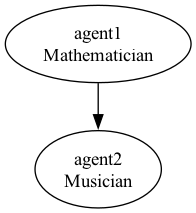

In [12]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client) 

Image(g.draw_relations())

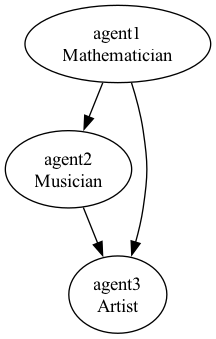

In [13]:
g.add_member(
        Member(
            name="agent3", role="Artist",
            description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
            ),[("agent1","agent3"),("agent2","agent3")]
    )

Image(g.draw_relations())

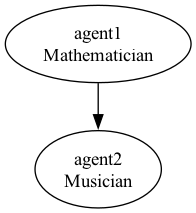

In [14]:
g.delete_member("agent3")
Image(g.draw_relations())

In [15]:

g.update_group_messages(Message(sender="user", action="talk", result="can you recommend me a art work?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
print("Selected Agent: ",next_agent)

Selected Agent:  agent2
